# Correlating two timeseries, using HF radar data

In [1]:
# Import Libraries
import numpy as np
from netCDF4 import Dataset
from netCDF4 import num2date, date2num
import matplotlib.pyplot as plt
import datetime

In [2]:
# Load the HF radar data in netCDF format, downloaded from AODN
hfr_data = Dataset('output.nc')

In [17]:
# Get time units, calendar used, and convert from num to date
units = hfr_data.variables['TIME'].units
calendar = hfr_data.variables['TIME'].calendar
t = num2date(hfr_data.variables['TIME'][:], units=units, calendar=calendar)

In [3]:
# Assign Variables
u = hfr_data.variables['UCUR'][:,:,:]
v = hfr_data.variables['VCUR'][:,:,:]
lon = hfr_data.variables['LONGITUDE'][:]
lat = hfr_data.variables['LATITUDE'][:]
s = (u**2 + v**2)**0.5

In [10]:
# What are the dimensions?
np.shape(u), np.shape(lat), np.shape(lon)

((409, 167, 114), (167,), (114,))

In [110]:
# Take a look at the time coverage
amt = np.isfinite(v) # get boolean if a number
utot = amt.sum(axis=0) # count how much data
# dplot = utot/utot.max()*100 # get data coverage as a percent, normalized by max coverage
dplot = utot/len(t)*100 # get data coverage as a percent over the time period

Text(0.5,1,'Percentage of Data Returns')

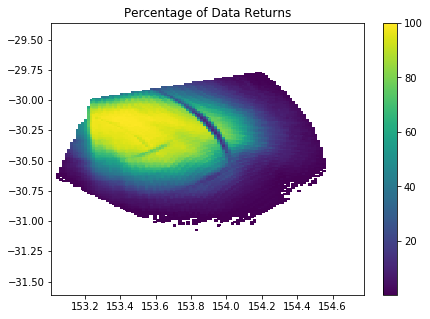

In [111]:
plt.figure(figsize=(7,5))
plt.pcolor(lon,lat,dplot), plt.colorbar()
plt.title('Percentage of Data Returns')

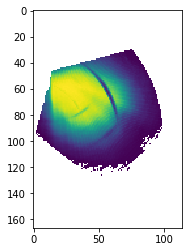

In [87]:
plt.imshow(dplot) # for manually choosing the grid points to correlate (i.e. want to pick a good coverage region)

In [99]:
# Choose 2 grid points to correlate in V
latIndex = 70 # chosen subjectively based on plot above
lonIndex1 = 20 # chosen subjectively based on plot above
lonIndex2 = 30 # chosen subjectively based on plot above

v1 = v[:,latIndex,lonIndex1] # one near shore
v2 = v[:,latIndex,lonIndex2] # one further offshore

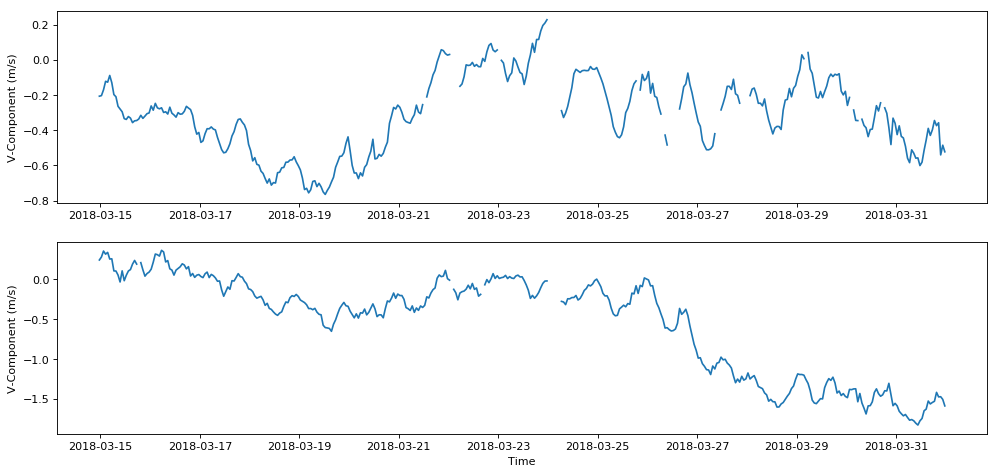

In [100]:
# Plot Timeseries of the two chosen grid points
figure1 = plt.figure(figsize=(15,7), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.plot(t,v1)
plt.ylabel('V-Component (m/s)')

plt.subplot(212)
plt.plot(t,v2)
plt.ylabel('V-Component (m/s)')
plt.xlabel('Time')

plt.show()

In [101]:
type(v1), type(v2) # What are the data types?

(numpy.ma.core.MaskedArray, numpy.ma.core.MaskedArray)

In [109]:
np.corrcoef(v1,v2) # Correlate!

array([[1.        , 0.42132162],
       [0.42132162, 1.        ]])

So we find the correlation between the two timeseries is 0.42, which is quite low. This is likely due to the distance offshore. If we looked at two grid points at the same longitude and different latitudes we would likely find much higher correlations.